一開始先把all_beta_normalized_train 改為 只保留 |dbeta| > 0.35的版本

In [ ]:
import pandas as pd

nor = pd.read_csv("../champ/all_beta_normalized_train.csv")
bio = pd.read_csv("../result/result_max_per_gene_single.csv")

print(nor.head())
print(bio.head())

df_mix = pd.merge(nor, bio,how='inner',left_on="Unnamed: 0",right_on= "Unnamed: 0")

result_df = df_mix[nor.columns]

print(result_df.head())

result_df.to_csv("../result/all_beta_normalized_train_035.csv",index=False)

   Unnamed: 0         1         2         3         4         5         6  \
0  cg00000957  0.825079  0.825079  0.836188  0.836188  0.855953  0.855953   
1  cg00001349  0.690023  0.690023  0.802989  0.802989  0.744400  0.744400   
2  cg00001583  0.095879  0.095879  0.030527  0.030527  0.058828  0.058828   
3  cg00002028  0.037414  0.037414  0.028130  0.028130  0.036667  0.036667   
4  cg00002837  0.393330  0.393330  0.278496  0.278496  0.354795  0.354795   

          7         8         9  ...       881       882       883       884  \
0  0.856379  0.856379  0.833668  ...  0.901550  0.901550  0.873928  0.873928   
1  0.826541  0.826541  0.683470  ...  0.864090  0.864090  0.878295  0.878295   
2  0.103293  0.103293  0.054348  ...  0.788893  0.788893  0.566003  0.566003   
3  0.026973  0.026973  0.032372  ...  0.053580  0.053580  0.037539  0.037539   
4  0.371494  0.371494  0.372948  ...  0.799111  0.799111  0.654631  0.654631   

        885       886       887       888       889     

取得套件

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

拿取train 資料

In [23]:
normalized_train = pd.read_csv('../result/all_beta_normalized_train_035.csv')

normalized_test = pd.read_csv('../result/all_beta_normalized_test_035.csv')

normalized_train_c = normalized_train[normalized_train['Unnamed: 0'].isin(normalized_test['Unnamed: 0'])]

X_train = normalized_train_c.iloc[:, 1::2]

將資料作為每個人的特徵

In [17]:
x = []

for i in range(445):
    X = X_train.iloc[:, i]

    X = X.values.flatten().tolist()

    x.append(X)

print(x[1])

y = [ (0 if i < 47 else 1)  for i in range(445)]

x = np.array(x)
y = np.array(y)


print(type(x),'x')
print(type(y),'y')


[0.07964195547395, 0.0306162399185655, 0.261522527187986, 0.0317381601785272, 0.0661343516750564, 0.034124742346744, 0.0612473721093203, 0.0405033425088478, 0.0421166306695464, 0.0441721288116272, 0.0588695788320025, 0.100177409816677, 0.294601927214894, 0.0876644736842105, 0.0261368291683736, 0.0257815419105742, 0.101882377964479, 0.0357238069848041, 0.117163321248563, 0.150895679662803, 0.0335174252523329, 0.0537719125467796, 0.0165824835604689, 0.859179019384265, 0.0384339448601004, 0.111423626135872, 0.0458655804480652, 0.0535502457210642, 0.0518960766303635, 0.0425753840318604, 0.048770424162403, 0.0380732015145141, 0.0406645177287379, 0.18425676467143, 0.0516438973127158, 0.0170070862859525, 0.0338581183611533, 0.0476667780376434, 0.0346178372961647, 0.0306251828733054, 0.0335010891609705, 0.0288745488351745, 0.0267751073745774, 0.0240879120879121, 0.0305685358255452, 0.0302554352318757, 0.12283056860677, 0.0457521374104598, 0.0245553145336226, 0.069061067888735, 0.09800873049094

開始預測

In [18]:

# 建立 Random Forest Classifier 模型
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
# 使用訓練資料訓練模型

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

randomForestModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = randomForestModel.predict(X_train)
predicted_t = randomForestModel.predict(X_test)

print('訓練集: ',randomForestModel.score(X_train,y_train))
print('測試集: ',randomForestModel.score(X_test,y_test))

# 預測成功的比例


訓練集:  1.0
測試集:  0.9775280898876404


將特徵重要程度輸出並匯出

In [19]:

print('特徵重要程度: ',randomForestModel.feature_importances_)

df = pd.DataFrame({
    'Probe_ID': normalized_train['Unnamed: 0'],
    'import_level_in_forest': randomForestModel.feature_importances_
})

# print(df)

df.to_csv("../result/imp_level.csv",index=False)

特徵重要程度:  [0.00000000e+00 2.97328123e-02 1.82492114e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.98981721e-04
 7.41931642e-04 0.00000000e+00 0.00000000e+00 5.94236318e-03
 2.10323990e-03 7.05051403e-04 0.00000000e+00 0.00000000e+00
 2.22776590e-03 0.00000000e+00 0.00000000e+00 1.68167086e-03
 1.30965812e-03 1.48727284e-03 0.00000000e+00 2.40460928e-04
 0.00000000e+00 2.92437570e-03 1.54554697e-02 1.59462681e-03
 2.20672210e-03 0.00000000e+00 2.76781157e-02 1.46366966e-04
 1.00306330e-02 2.16103341e-04 0.00000000e+00 0.00000000e+00
 6.79195757e-04 0.00000000e+00 1.37250035e-02 6.52895678e-04
 0.00000000e+00 2.72011902e-03 3.93783530e-04 3.74579125e-04
 6.86000905e-04 0.00000000e+00 2.94923244e-04 0.00000000e+00
 3.17408426e-04 0.00000000e+00 0.00000000e+00 1.43977999e-04
 0.00000000e+00 4.05694153e-04 9.68239843e-04 0.00000000e+00
 0.00000000e+00 7.27627305e-02 0.00000000e+00 0.00000000e+00
 1.15204343e-03 0.00000000e+00 2.53267057e-02 2.06018519e-04
 0.00000000e+00

使用cross validation 並拓展多棵樹(100~1100)

[0.98876404 0.98876404 0.97752809 0.98876404 0.98876404]
0.9865168539325841


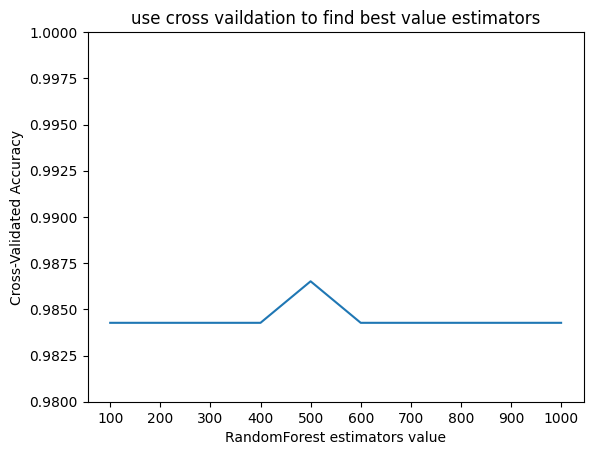

In [20]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')

scores = cross_val_score(randomForestModel,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

k_range = range(100,1100,100)
rf_score_n_estimators = []

for i in range(100,1100,100):
    randomForestModel = RandomForestClassifier(n_estimators=i, criterion = 'gini')
    scores = cross_val_score(randomForestModel,x,y,cv=5,scoring='accuracy')
    rf_score_n_estimators.append(scores.mean())

# print(df)

plt.plot(k_range,rf_score_n_estimators)
plt.ylim(0.98,1.0)
plt.xlabel('RandomForest estimators value')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.title('use cross vaildation to find best value estimators')
plt.show()

In [59]:
dc = []
cl_1 = pd.read_csv("../result/cluster_3_rank.csv")

normalized_test = pd.read_csv('../result/all_beta_normalized_test_035.csv')

normalized_train_c = normalized_train[normalized_train['Unnamed: 0'].isin(cl_1['Probe_ID'])]

X_train = normalized_train_c.iloc[:, 1::2]
    
x = []

for i in range(445):
    X = X_train.iloc[:, i]

    X = X.values.flatten().tolist()

    x.append(X)
    
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
# 使用訓練資料訓練模型

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=i)
    #random_state => 改變其亂數，不然將會三次都切到同樣的數據
    # print(y_train) #確認是否改變，
    randomForestModel.fit(X_train, y_train)
    # 使用訓練資料預測分類
    predicted = randomForestModel.predict(X_train)
    predicted_t = randomForestModel.predict(X_test)

    print('訓練集: ',randomForestModel.score(X_train,y_train))
    print('測試集: ',randomForestModel.score(X_test,y_test))

    # print('特徵重要程度: ',randomForestModel.feature_importances_)

    df = pd.DataFrame({
        'Probe_ID': normalized_train_c['Unnamed: 0'],
        'import_level_in_forest': randomForestModel.feature_importances_
    })

    print(df.head(10))

    df.to_csv("../result/imp_level_cl_3/result_"+str(i+1)+".csv",index=False)
    
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')

scores = cross_val_score(randomForestModel,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())


訓練集:  1.0
測試集:  0.9775280898876404
      Probe_ID  import_level_in_forest
4   cg09106903                0.000241
9   cg18279094                0.001260
14  cg00097146                0.005045
16  cg07974511                0.003209
17  cg09238180                0.007408
19  cg10364040                0.009895
20  cg11546137                0.000196
22  cg21185289                0.001161
24  cg22674699                0.000360
27  cg04738965                0.000965
訓練集:  1.0
測試集:  1.0
      Probe_ID  import_level_in_forest
4   cg09106903                0.002024
9   cg18279094                0.002482
14  cg00097146                0.000247
16  cg07974511                0.006195
17  cg09238180                0.001051
19  cg10364040                0.005118
20  cg11546137                0.000000
22  cg21185289                0.006748
24  cg22674699                0.000000
27  cg04738965                0.006394
訓練集:  1.0
測試集:  0.9887640449438202
      Probe_ID  import_level_in_forest
4   cg0910690